# Capstone Project Part II
### By Bailey Duncan

The full report and problem summary can be found [here](./Capstone%20Report.md).

In [1]:
!pip install --upgrade pandas 
import pandas as pd
import numpy as np

# Machine Learning & Data Science Helper Library
import sklearn

# Map rendering library
import folium

Requirement already up-to-date: pandas in c:\users\baileyduncan\anaconda3\lib\site-packages (0.24.2)


In [2]:
apt_rentals = pd.read_csv("apt_rentals_X_neighborhood.csv")

In [3]:
apt_rentals.drop(['Unnamed: 0', 'Address', 'Neighborhood'], axis=1, inplace=True)
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Postal Code,Borough
0,1,1.0,1,43.643051,-79.391643,2150.0,M5V,Downtown Toronto
1,1,1.0,0,43.640918,-79.393982,1900.0,M5V,Downtown Toronto
2,1,1.0,0,43.641308,-79.400093,1900.0,M5V,Downtown Toronto
3,1,1.0,1,43.640068,-79.399960,2400.0,M5V,Downtown Toronto
4,1,1.0,0,43.647627,-79.390408,2650.0,M5V,Downtown Toronto


## Add another feature: Distance from Downtown (Lets say from City Hall)
### Toronto City Hall (Latitude: 43.653908, Longitude: -79.384293)

In [4]:
downtown_lat = 43.653908
downtown_long = -79.384293

In [5]:
# compute euclidean distance
apt_rentals['Downtown Proximity'] = np.linalg.norm(apt_rentals[['Lat', 'Long']].sub(np.array([downtown_lat, downtown_long])), axis=1)

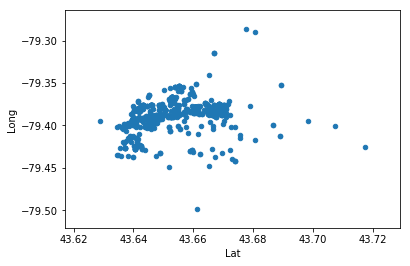

In [7]:
apt_rentals.plot.scatter(x='Lat', y='Long')

In [8]:
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Postal Code,Borough,Downtown Proximity
0,1,1.0,1,43.643051,-79.391643,2150.0,M5V,Downtown Toronto,0.013111
1,1,1.0,0,43.640918,-79.393982,1900.0,M5V,Downtown Toronto,0.016206
2,1,1.0,0,43.641308,-79.400093,1900.0,M5V,Downtown Toronto,0.020209
3,1,1.0,1,43.640068,-79.399960,2400.0,M5V,Downtown Toronto,0.020905
4,1,1.0,0,43.647627,-79.390408,2650.0,M5V,Downtown Toronto,0.008766


In [9]:
apt_rentals.corr()

,Bedroom,Bathroom,Den,Lat,Long,Price,Downtown Proximity
Bedroom,1.000000,0.746418,-0.247217,-0.064679,-0.080318,0.554753,0.074447
Bathroom,0.746418,1.000000,-0.142905,-0.049076,0.075154,0.576192,-0.048037
Den,-0.247217,-0.142905,1.000000,-0.152485,0.005625,0.055606,-0.008705
Lat,-0.064679,-0.049076,-0.152485,1.000000,0.225499,-0.219085,0.116950
Long,-0.080318,0.075154,0.005625,0.225499,1.000000,0.097965,-0.410571
Price,0.554753,0.576192,0.055606,-0.219085,0.097965,1.000000,-0.181565
Downtown Proximity,0.074447,-0.048037,-0.008705,0.116950,-0.410571,-0.181565,1.000000


In [20]:
apt_rentals['Borough'].value_counts()

Downtown Toronto    654
West Toronto         79
Central Toronto      21
East Toronto         10
Name: Borough, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016303DE3A90>,
      dtype=object)

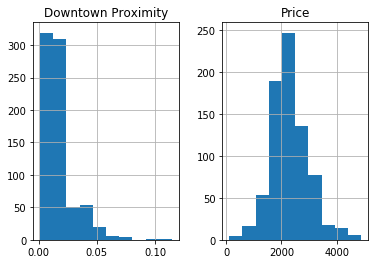

In [11]:
apt_rentals[['Price', 'Downtown Proximity']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163041546D8>,
      dtype=object)

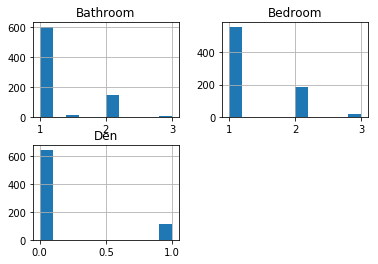

In [12]:
apt_rentals[['Bathroom', 'Den', 'Bedroom']].hist()

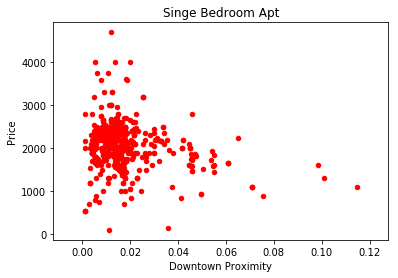

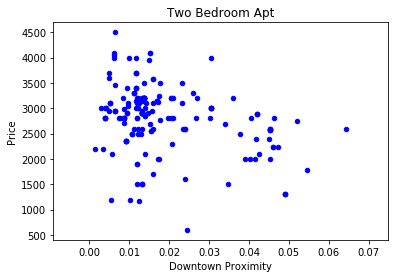

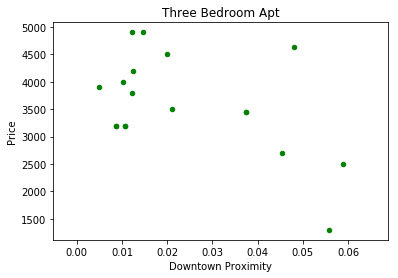

In [13]:
apt_rentals.loc[apt_rentals['Bedroom']==1].plot.scatter(x='Downtown Proximity', y='Price', c='Red', title="Singe Bedroom Apt")
apt_rentals.loc[apt_rentals['Bedroom']==2].plot.scatter(x='Downtown Proximity', y='Price', c="Blue", title='Two Bedroom Apt')
apt_rentals.loc[apt_rentals['Bedroom']==3].plot.scatter(x='Downtown Proximity', y='Price', c="Green", title='Three Bedroom Apt')

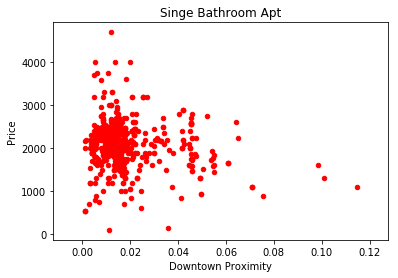

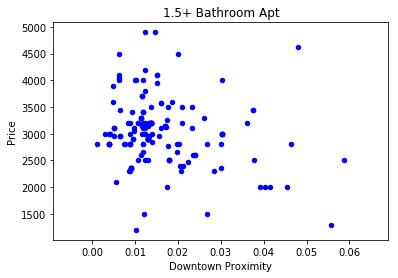

In [14]:
apt_rentals.loc[apt_rentals['Bathroom'] == 1].plot.scatter(x='Downtown Proximity', y='Price', c='Red', title="Singe Bathroom Apt")
apt_rentals.loc[apt_rentals['Bathroom'] > 1].plot.scatter(x='Downtown Proximity', y='Price', c="Blue", title='1.5+ Bathroom Apt')

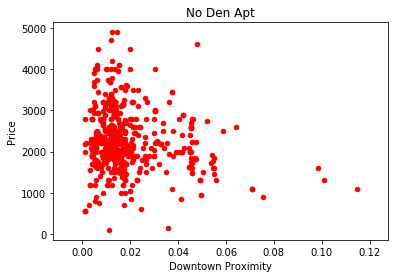

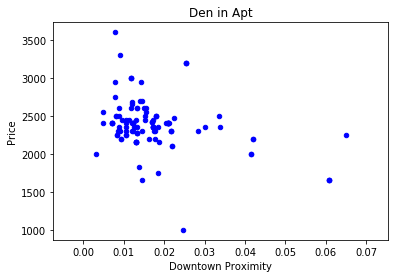

In [31]:
apt_rentals.loc[apt_rentals['Den'] == 0].plot.scatter(x='Downtown Proximity', y='Price', c='Red', title="No Den Apt")
apt_rentals.loc[apt_rentals['Den'] > 0].plot.scatter(x='Downtown Proximity', y='Price', c="Blue", title='Den in Apt')

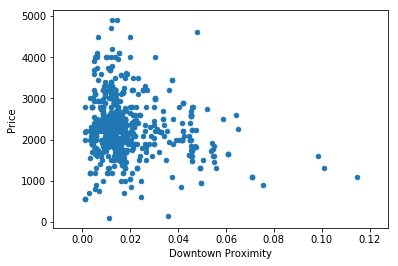

In [16]:
apt_rentals.plot.scatter(x='Downtown Proximity', y='Price')

In [35]:
def color(neighborhood):
    colors = {
        'Downtown Toronto':1,
        'East Toronto':2,
        'West Toronto':3,
        'Central Toronto':4
    }
    
    return colors[neighborhood]

In [36]:
apt_rentals['Borough Color'] = apt_rentals['Borough'].apply(lambda borough: color(borough))
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Postal Code,Borough,Downtown Proximity,Borough Color
0,1,1.0,1,43.643051,-79.391643,2150.0,M5V,Downtown Toronto,0.013111,1
1,1,1.0,0,43.640918,-79.393982,1900.0,M5V,Downtown Toronto,0.016206,1
2,1,1.0,0,43.641308,-79.400093,1900.0,M5V,Downtown Toronto,0.020209,1
3,1,1.0,1,43.640068,-79.399960,2400.0,M5V,Downtown Toronto,0.020905,1
4,1,1.0,0,43.647627,-79.390408,2650.0,M5V,Downtown Toronto,0.008766,1


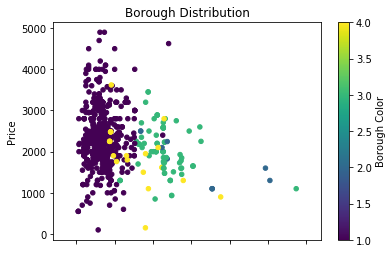

In [40]:
apt_rentals.plot.scatter(x='Downtown Proximity', y='Price', c='Borough Color', title="Borough Distribution", colormap='viridis')

## Now lets bring in our venues and take a look at them

In [ ]:
toronto_venues = pd.read_csv("venuesX.csv")